<a id='head'></a>

# Рекомендация тарифов

## Оглавление
 
- [**Введение**](#intro)
    - [Входные данные](#input_data)
    - [Цели исследования](#purpose)
    
- [**1. Обзор данных**](#review)
    - [1.1 Импорт библиотек и датасета](#review_01)
    - [1.2 Обзор данных](#review_02)

- [**2. Создание выборок**](#split)

- [**3. Исследование качества разных моделей**](#model)
    - [3.1 Решающее дерево](#model_01)
    - [3.2 Случайный лес](#model_02)
    - [3.3 Логистическая регрессия](#model_02)
    - [Выводы](#model_conclusions)
    
- [**4. Проверка модели на тестовой выборке**](#test)

- [**5. Проверка модели на вменяемость**](#adequacy)

- [**6. Общий вывод**](#final_conclusion)

- [Чек лист](#check_list)

<a id='intro'></a>
## Введение

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: **«Смарт»** или **«Ультра»**.

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

- `сalls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество sms-сообщений,
- `mb_used` — израсходованный интернет-трафик в Мб,
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<a id='purpose'></a>
### Цели исследования [▴](#head)

- Необходимо построить модель с максимально большим значением `accuracy`.
- Требуется довести долю правильных ответов по крайней мере до `0.75`.
- Проверить `accuracy` на тестовой выборке.

<a id='review'></a>
## 1. Обзор данных

<a id='review_01'></a>
### 1.1 Импорт библиотек и датасета [▴](#head)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# для того чтобы код работал локально и на Практикуме применим конструкцию try-except
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('datasets/users_behavior.csv')

<a id='review_02'></a>
### 1.2 Обзор данных [▴](#head)

In [3]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Данные в полном порядке, пропусков нет, тип данных сооветсвует предоставленной информации.

Можем приступать к исследованию.

<a id='split'></a>
## 2. Создание выборок

Разделим нашу выборку на 3 части в следующих пропорциях:
- Тренировочную - `60%`
- Валидационную - `20%`
- Тестовую - `20%`

Делим основной датафрейм:
- на обычные `features` 
- и целевые `target` параметры

In [5]:
features = df.drop(['is_ultra'], axis=1)
target = df.is_ultra

Теперь разделим наши выборки на тренировочные `train` и валидационные `valid` с соотношением `60/40`. 

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, 
    random_state=12345,
    test_size=0.4,
    stratify=target)

Для того чтобы получить тестовые `test` выборки, разделим наши валидационные `valid` выборки в соотношении `50/50` 

In [7]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, 
    random_state=12345,
    test_size=0.5,
    stratify=target_valid)

Проверяем полученные выборки:

In [8]:
print('Тренирвочные:')
print('Доля:', len(features_train) / len(df), '| Features:', features_train.shape)
print('Доля:', len(target_train) / len(df), '| Target:', target_train.shape, '\n')

print('Валидационные:')
print('Доля:', len(features_valid) / len(df), '| Features:', features_valid.shape)
print('Доля:', len(target_valid) / len(df), '| Target:', target_valid.shape, '\n')
    
print('Тестовые:')
print('Доля:', len(features_test) / len(df), '| Features:', features_test.shape)
print('Доля:', len(target_test) / len(df), '| Target:', target_test.shape)

Тренирвочные:
Доля: 0.5998755444928439 | Features: (1928, 4)
Доля: 0.5998755444928439 | Target: (1928,) 

Валидационные:
Доля: 0.2000622277535781 | Features: (643, 4)
Доля: 0.2000622277535781 | Target: (643,) 

Тестовые:
Доля: 0.2000622277535781 | Features: (643, 4)
Доля: 0.2000622277535781 | Target: (643,)


Мы получили необходимые выборки, можно приступать к исследованиям.

<a id='model'></a>
## 3. Исследование качества разных моделей

<a id='model_01'></a>
### 3.1 Решающее дерево [▴](#head)

Для перебора гиперпараметров и выбора модели с лучшим результатом будем использовать цикл.

In [9]:
%%time

best_model = None
best_depth = 0
best_result = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=111, max_depth=depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    
    if result > best_result:
        best_depth = depth
        best_model = model
        best_result = result

print("Accuracy лучшей модели:", best_result, '| max_depth =:', best_depth)

Accuracy лучшей модели: 0.7993779160186625 | max_depth =: 8
Wall time: 66.9 ms


<a id='model_02'></a>
### 3.2 Случайный лес [▴](#head)

In [10]:
%%time

best_model = None
best_depth = 0
best_result = 0
best_est = 0

for est in range(10, 51, 10):
    
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=111, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)

        if result > best_result:
            best_est = est
            best_depth = depth
            best_model = model
            best_result = result

print("Accuracy лучшей модели:", best_result, '| n_estimators =', best_est, '| max_depth =', best_depth)

Accuracy лучшей модели: 0.8180404354587869 | n_estimators = 30 | max_depth = 6
Wall time: 3.08 s


<a id='model_03'></a>
### 3.3 Логистическая регрессия [▴](#head)

In [11]:
%%time

model = LogisticRegression(random_state=111, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)

print("Accuracy:", result)

Accuracy: 0.7387247278382582
Wall time: 48.9 ms


<a id='model_conclusions'></a>
### Выводы [▴](#head)

По результату сравнения самой точной моделью оказался `Случайный лес` с результатом `81.8%` на валидационной выборке.

Однако есть нюанс. Точность не сильно превышает ту, что выдала модель `Решающее дерево` с её `79.9%`, а вот время выполнения у `Решающего дерева` оказалось `в 50 раз быстрее` чем у `Случайного леса`. 

Для нашего случая это не столь критично, так как выборка небольшая. Однако стоит учитывать такую разницу в скорости при работе с большими массивами.


Модель|Accuracy|Время обучения
-|-|-
Логистическая регрессия|0.73872|53.8 ms
Дерево решений|0.79937|60.8 ms
Случайный лес|0.81804|3.08 s

P.S.
- Время выполнения может отличаться на разных машинах.

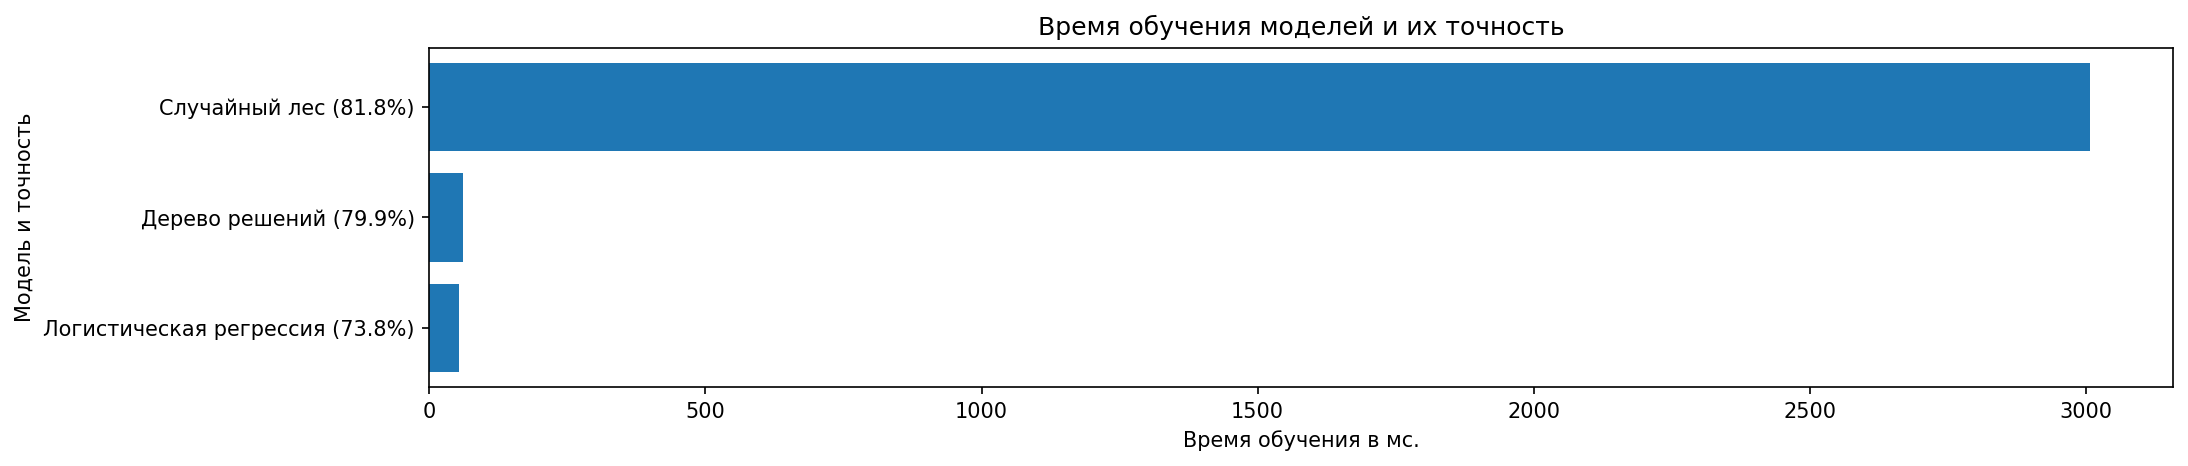

In [12]:
plt.figure(figsize=(15,3), dpi=150)
plt.barh(['Логистическая регрессия (73.8%)', 
         'Дерево решений (79.9%)', 
         'Случайный лес (81.8%)'], 
        [53, 60, 3008])

plt.title('Время обучения моделей и их точность')
plt.xlabel('Время обучения в мс.')
plt.ylabel('Модель и точность')
plt.show()

<a id='test'></a>
## 4. Проверка модели на тестовой выборке

Для решения нашей задачи делаем выбор в пользу модели `Случайный лес`

Проверим ее на тестовой выборке. В качестве гиперпараметров укажем значения, которые мы получили на лучшей модели.
- `random_state=111`
- `n_estimators=30`
- `max_depth=6`

In [13]:
model = RandomForestClassifier(random_state=111, 
                               n_estimators=30, 
                               max_depth=6)

model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print(model.score(features_valid, target_valid), '| Валидационная выборка')
print(accuracy_score(target_test, predictions_test), '| Тестовая выборка')

0.8180404354587869 | Валидационная выборка
0.8180404354587869 | Тестовая выборка


На тестовой выборке качество модели полностью совпало с валидационной.

Качество в `81.8%` нас полсностью устраивает.

<a id='adequacy'></a>
## 5. Проверка модели на вменяемость

Для проверки нашей модели на адекватность, проделаем аналогичные рассчеты с помощью классификатора `DummyClassifier` из блиблиотеки `sklearn`.

Для того чтобы попробовать разные стратегии применим цикл.

In [14]:
for i in ['most_frequent', 'prior', 'stratified', 'uniform']: # перебираем стратегии обучения
    model = DummyClassifier(strategy=i, random_state=111)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    print("Accuracy:", result, '|', i)

Accuracy: 0.6936236391912908 | most_frequent
Accuracy: 0.6936236391912908 | prior
Accuracy: 0.578538102643857 | stratified
Accuracy: 0.4665629860031104 | uniform


Как мы видим по результату теста, все обученные с помощью `DummyClassifier` модели дают результат хуже, чем любая из примененных нами.

Можем сделать вывод, что наши модели работают адекватно.

<a id='final_conclusion'></a>
## 6. Общий вывод

Для построения системы предсказания тарифов **«Смарт»** и **«Ультра»** для клиентов, необходимо использовать модель обучения `Случайный лес` `RandomForestClassifier` со следующими гиперпараметрами:
- `random_state=111`
- `n_estimators=30`
- `max_depth=6`

Данная модель показала максимальные параметры точности в ходе эксперимента. 

Вероятность удачного предсказания в таком случае будет держаться на уровне `81%`